Assignment on Model Selection

In [202]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Load Titanic Dataset

In [203]:
# read the dataset
data=pd.read_csv('/content/titanic_dataset .csv')

In [204]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Data Preprocessing

In [205]:
# basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [206]:
# check for null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are missing values only in Age and Cabin. Since 687 fields are missing in Cabin, we can drop the column.

In [207]:
data['Cabin'].nunique()

147

In [208]:
# drop Cabin ID as it is also not relevant and has many missing values
data.drop('Cabin',axis=1,inplace=True)

In [209]:
data['PassengerId'].nunique()

891

In [210]:
# setting PassengerID as the index
data.set_index('PassengerId', inplace=True)

In [211]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [212]:
# drop Ticket,Name column and it is not relevant for further predictions
data.drop('Ticket',axis=1,inplace=True)
data.drop('Name',axis=1,inplace=True)

In [213]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [214]:
data['Age'].skew()

0.38910778230082704

In [215]:
# treat missing values in Age using median as it is slightly skewed
data['Age'].fillna(data['Age'].median(),inplace=True)

In [216]:
# treat missing values in Embarked using mode
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [217]:
data.isna().sum()               # no NAN values

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

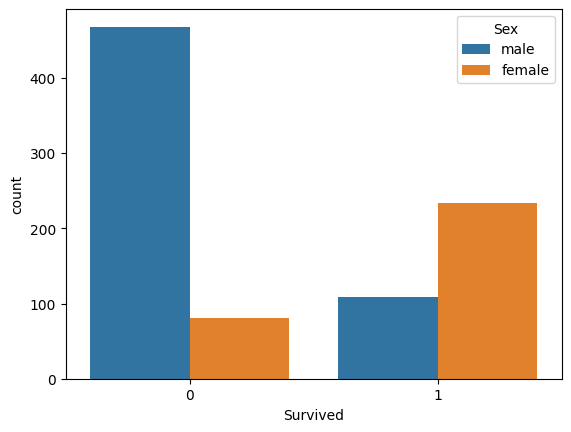

In [218]:
sns.countplot(x='Survived',data=data,hue = 'Sex')                                      # more female survived as they were rescued first

<Axes: xlabel='Survived', ylabel='count'>

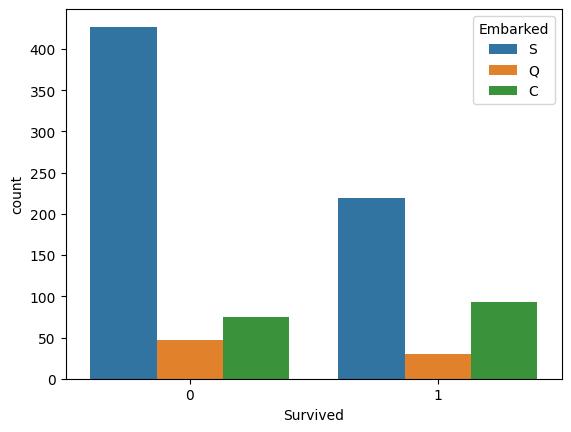

In [219]:
sns.countplot(x='Survived',data=data,hue = 'Embarked')                                         # people who embarked from Southampton survived more than others

<Axes: xlabel='Survived', ylabel='count'>

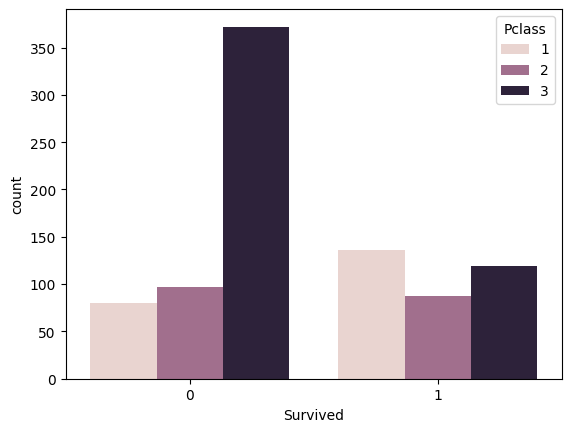

In [220]:
sns.countplot(x='Survived',data=data,hue = 'Pclass')                                      # distribution of Passenger class vs their survival

In [221]:
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

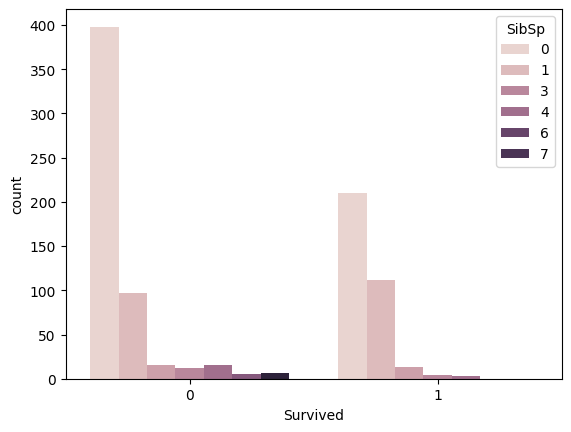

In [222]:
sns.countplot(x='Survived',data=data,hue = 'SibSp')

Text(0, 0.5, 'No. of Passengers')

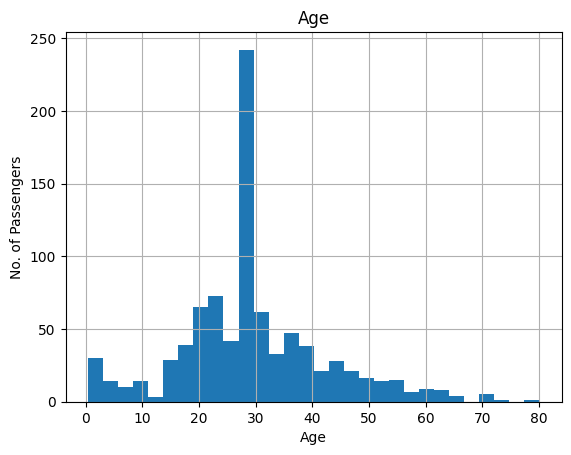

In [223]:
figure=data.Age.hist(bins=30)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No. of Passengers')

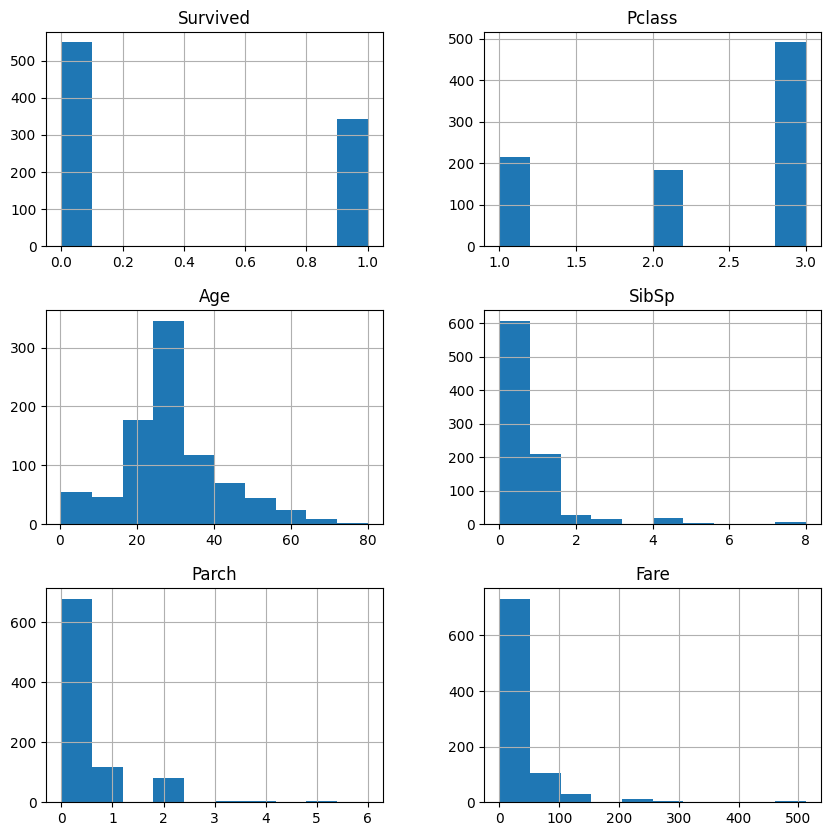

In [224]:
data.hist(figsize=(10,10))
plt.show()

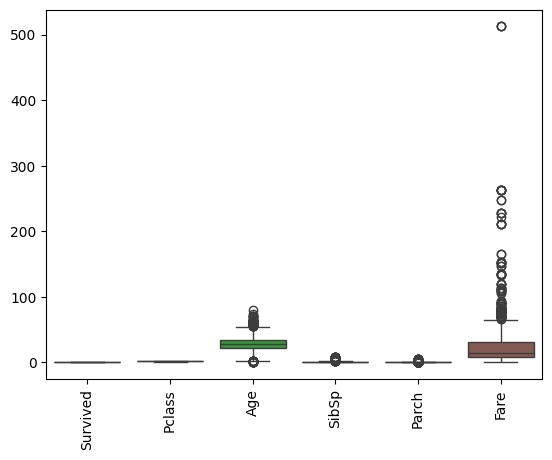

In [225]:
# to check for outliers using boxplot
sns.boxplot(data[['Survived','Pclass','Age','SibSp','Parch','Fare']])
plt.xticks(rotation=90)
plt.show()


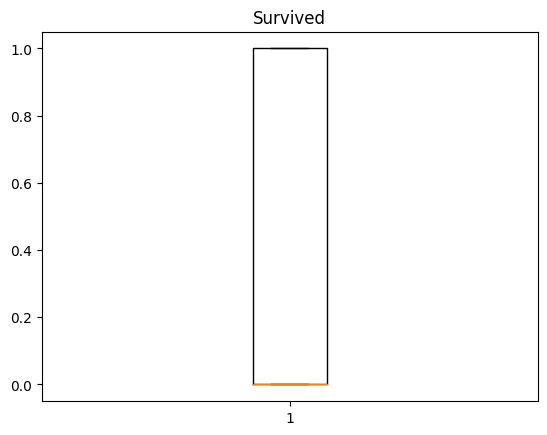

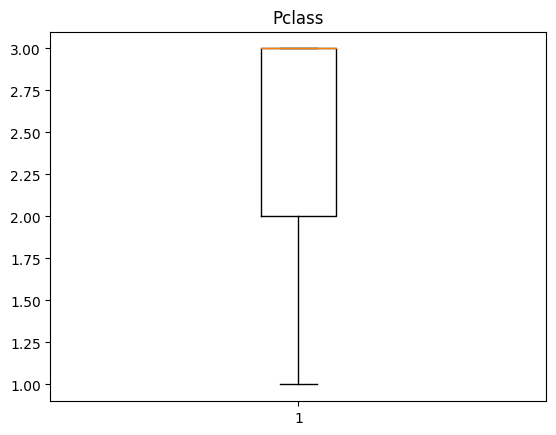

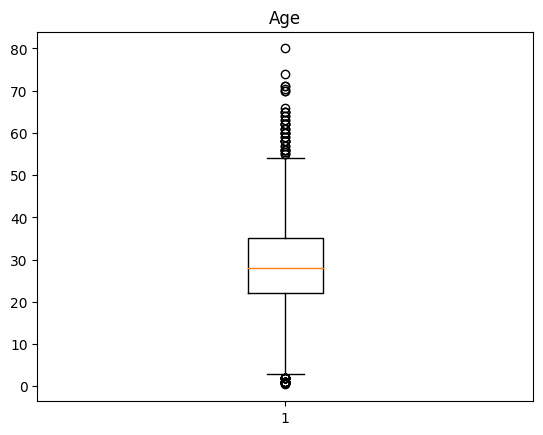

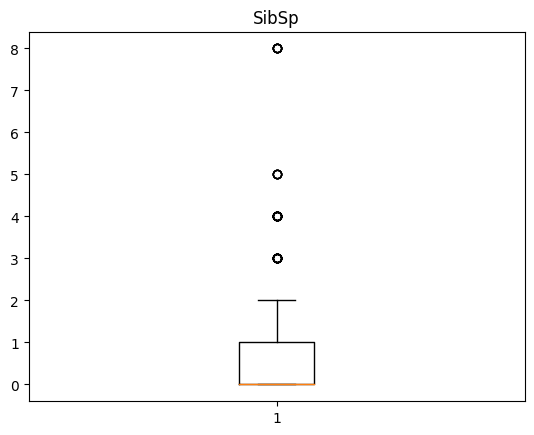

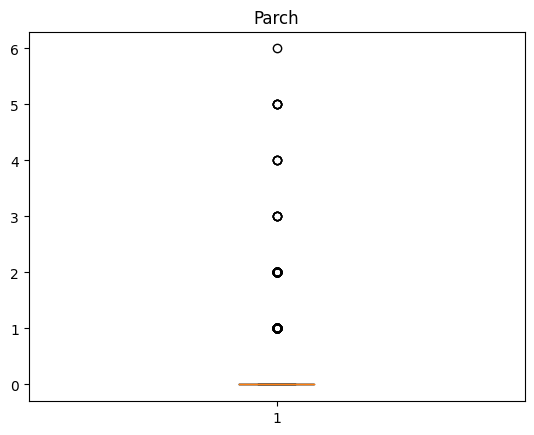

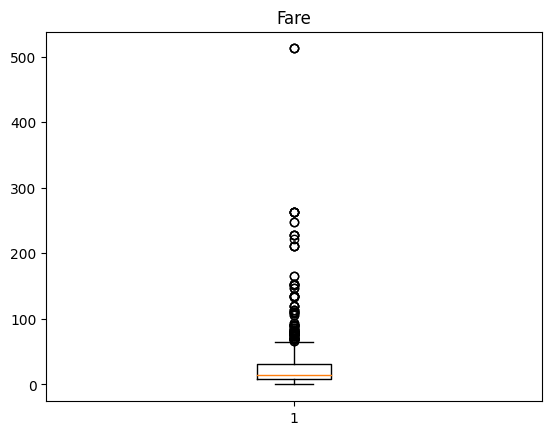

In [226]:
numcols=['Survived','Pclass','Age','SibSp','Parch','Fare']
for i in numcols:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i);

In [227]:
data.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.510245
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

In [228]:
# treating outliers in Age and Fare using IQR method
for i in ['Age','Fare','SibSp']:
    Q1=np.percentile(data[i],25,method='midpoint')
    Q3=np.percentile(data[i],75,method='midpoint')
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    outliers=[]
    for j in data[i]:
        if ((j < low_lim) | (j > up_lim)):
            outliers.append(j)
    data[i]=data[i].clip(lower=low_lim,upper=up_lim)

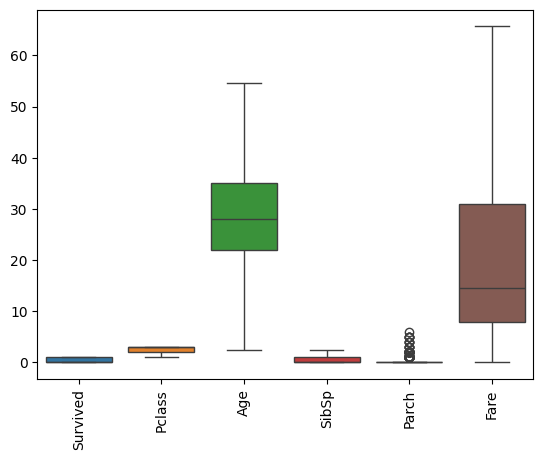

In [229]:
sns.boxplot(data[['Survived','Pclass','Age','SibSp','Parch','Fare']])
plt.xticks(rotation=90)
plt.show()


In [230]:
# to check correlation of the attributes
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.060622,0.031434,0.081629,0.317430
Pclass,-0.338481,1.000000,-0.340404,0.023180,0.018443,-0.715300
Age,-0.060622,-0.340404,1.000000,-0.247806,-0.178959,0.144544
SibSp,0.031434,0.023180,-0.247806,1.000000,0.409366,0.349615
Parch,0.081629,0.018443,-0.178959,0.409366,1.000000,0.292616
Fare,0.317430,-0.715300,0.144544,0.349615,0.292616,1.000000


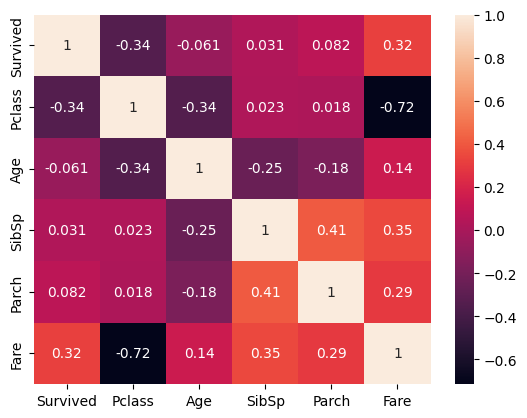

In [231]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [232]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.039282,0.426487,0.381594,24.046813
std,0.486592,0.836071,12.072074,0.708246,0.806057,20.481625
min,0.000000,1.000000,2.500000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,54.500000,2.500000,6.000000,65.634400


In [233]:
data['SibSp'].value_counts()

0.0    608
1.0    209
2.5     46
2.0     28
Name: SibSp, dtype: int64

In [234]:
data.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1.0,0,7.2500,S
2,1,1,female,38.0,1.0,0,65.6344,C
3,1,3,female,26.0,0.0,0,7.9250,S
4,1,1,female,35.0,1.0,0,53.1000,S
5,0,3,male,35.0,0.0,0,8.0500,S
6,0,3,male,28.0,0.0,0,8.4583,Q
7,0,1,male,54.0,0.0,0,51.8625,S
8,0,3,male,2.5,2.5,1,21.0750,S
9,1,3,female,27.0,0.0,2,11.1333,S


In [235]:
# using label encoder to encode data['Sex']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])

In [236]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1.0,0,7.2500,S
2,1,1,0,38.0,1.0,0,65.6344,C
3,1,3,0,26.0,0.0,0,7.9250,S
4,1,1,0,35.0,1.0,0,53.1000,S
5,0,3,1,35.0,0.0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0.0,0,13.0000,S
888,1,1,0,19.0,0.0,0,30.0000,S
889,0,3,0,28.0,1.0,2,23.4500,S


In [237]:
# used one-hot encoding for data['Embarked']
data=pd.get_dummies(data)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1.0,0,7.2500,0,0,1
2,1,1,0,38.0,1.0,0,65.6344,1,0,0
3,1,3,0,26.0,0.0,0,7.9250,0,0,1
4,1,1,0,35.0,1.0,0,53.1000,0,0,1
5,0,3,1,35.0,0.0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0.0,0,13.0000,0,0,1
888,1,1,0,19.0,0.0,0,30.0000,0,0,1
889,0,3,0,28.0,1.0,2,23.4500,0,0,1


Model Building - SVM and kNN

In [238]:
# assign features to X and target variable to Y
X=data.drop('Survived',axis=1)
y=data['Survived']

In [239]:
# Split the data for training and testing the model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.25)

In [240]:
# scaling for features in X
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xsc_train=sc.fit_transform(X_train)
Xsc_test=sc.fit_transform(X_test)
Xsc_train=pd.DataFrame(Xsc_train)
Xsc_test=pd.DataFrame(Xsc_test)

Using SVM model for predictions

In [241]:
from sklearn.svm import SVC
svm_clf=SVC()
svm_clf.fit(Xsc_train,y_train)

SVC()

In [242]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [243]:
svm_pred=sv_clf.predict(Xsc_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)

In [244]:
print("SVM Accuracy:", svm_accuracy)
print("precision_score:",svm_precision)
print("recall_score:",svm_recall)
print("f1_score:",svm_f1)
print("confusion_matrix: \n", confusion_matrix(y_test,svm_pred))

SVM Accuracy: 0.8116591928251121
precision_score: 0.8133333333333334
recall_score: 0.6853932584269663
f1_score: 0.7439024390243902
confusion_matrix: 
 [[120  14]
 [ 28  61]]


Using kNN model for predictions

In [245]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(Xsc_train,y_train)
knn_pred=classifier.predict(Xsc_test)

In [246]:
metric_k=[]
neighbors=np.arange(3,15)

In [247]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(Xsc_train,y_train)
  knn_pred=classifier.predict(Xsc_test)
  accuracy=accuracy_score(y_test,knn_pred)
  metric_k.append(accuracy)

Text(0, 0.5, 'Metric K')

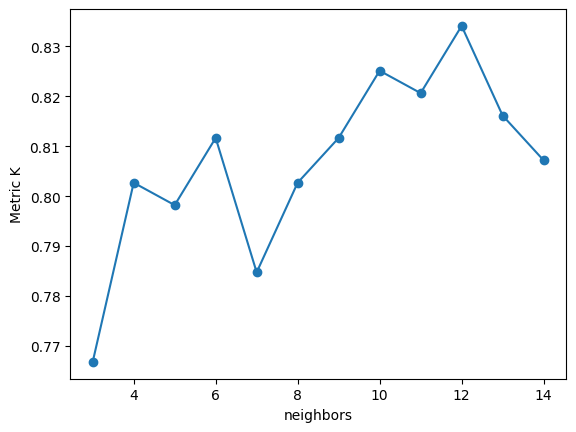

In [248]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('neighbors')
plt.ylabel('Metric K')

In [249]:
# using 12 neighbours for best accuracy
classifier=KNeighborsClassifier(n_neighbors=12,metric='minkowski',p=2)
classifier.fit(Xsc_train,y_train)
knn_pred=classifier.predict(Xsc_test)


In [250]:
print('Accuracy:',accuracy_score(y_test,knn_pred))
print('Precision:',precision_score(y_test,knn_pred))
print('Recall:',recall_score(y_test,knn_pred))
print('F1:',f1_score(y_test,knn_pred))
print('Confusion matrix : \n',confusion_matrix(y_test,knn_pred))

Accuracy: 0.8340807174887892
Precision: 0.8333333333333334
Recall: 0.7303370786516854
F1: 0.7784431137724552
Confusion matrix : 
 [[121  13]
 [ 24  65]]


both the models have similar predictions and kNN seems a slightly better model with fine tuning.

will next use cross validation to arrive at the best model

K-Fold Method - with SVM parameter

In [251]:
from sklearn.model_selection import KFold
kfold_validator=KFold(10)

In [252]:
# to find the score by cross validation
from sklearn.model_selection import cross_val_score
cv_result=cross_val_score(svm_clf,Xsc_train,y_train,cv=kfold_validator)

In [253]:
cv_result

array([0.82089552, 0.71641791, 0.86567164, 0.91044776, 0.7761194 ,
       0.79104478, 0.76119403, 0.74626866, 0.75757576, 0.89393939])

In [254]:
print('Average cross validation score :',cv_result.mean())

Average cross validation score : 0.8039574853007689


Stratified k Fold with SVM parameter

In [255]:
from sklearn.model_selection import StratifiedKFold
strat_validator=StratifiedKFold(n_splits=10)

In [256]:
strat_result=cross_val_score(svm_clf,Xsc_train,y_train,cv=strat_validator)

In [257]:
strat_result

array([0.80597015, 0.73134328, 0.86567164, 0.89552239, 0.82089552,
       0.73134328, 0.80597015, 0.70149254, 0.75757576, 0.90909091])

In [258]:
print('Average stratified validation score :',strat_result.mean())

Average stratified validation score : 0.8024875621890548


k-Fold using kNN paramater

In [259]:
from sklearn.model_selection import KFold
kfold_validator=KFold(10)

In [260]:
from sklearn.model_selection import cross_val_score
cv_result=cross_val_score(classifier,Xsc_train,y_train,cv=kfold_validator)

In [261]:
cv_result

array([0.79104478, 0.74626866, 0.85074627, 0.88059701, 0.82089552,
       0.80597015, 0.74626866, 0.74626866, 0.81818182, 0.87878788])

In [262]:
print('Average cross validation score :',cv_result.mean())

Average cross validation score : 0.8085029398462235


Stratified k-fold using kNN parameter

In [263]:
from sklearn.model_selection import StratifiedKFold
strat_validator=StratifiedKFold(n_splits=10)

In [264]:
strat_result=cross_val_score(classifier,Xsc_train,y_train,cv=strat_validator)

In [265]:
strat_result

array([0.80597015, 0.7761194 , 0.85074627, 0.88059701, 0.88059701,
       0.73134328, 0.7761194 , 0.73134328, 0.81818182, 0.90909091])

In [266]:
print('Average stratified validation score :',strat_result.mean())

Average stratified validation score : 0.816010854816825


After cross validation, kNN has given a better cross validation score than SVM